In [6]:
import sys
sys.path.append('../')
import mvcomp as mvc
import nibabel as nb
import os
from os.path import join, basename

import glob
import matplotlib.pyplot as plt
import numpy as np

# Define the path to subject directory

In [25]:
# indicate what is the subject path where all the feature images are located
# we will use the data in local_extras (check example 1 for more details on how to obtain it)
_mask_path = '../local_extras/sample_MRI'
_subject_path = "../local_extras/sample_MRI/001/"
P_folders = glob.glob(join(_subject_path,'*nii.gz'))

In [26]:
print(f"We have 3 feature files for this subject, they are\n{P_folders}")

We have 3 feature files for this subject, they are
['../local_extras/sample_MRI/001/T1w.nii.gz', '../local_extras/sample_MRI/001/inv2.nii.gz', '../local_extras/sample_MRI/001/T1map.nii.gz']


# Computing D2

In [35]:
# this is v. high res data and requires a large amount of memory to store the entire matrix, therefore we generate a restricted mask
# to be able to compute the matrix
n_vox = 5 #number of voxels in each dimension to compute matrix on

img = nb.load(P_folders[0])
_mask_d = np.zeros(img.shape)
#find the middle, create a cube off of the middle of the image
vox_mid = np.array(img.shape)/2
_mask_d[int(vox_mid[0]):int(vox_mid[0])+n_vox,int(vox_mid[1]):int(vox_mid[1])+n_vox,int(vox_mid[2]):int(vox_mid[2])+n_vox] = 1
mask_img = nb.Nifti1Image(_mask_d,affine=img.affine,header=img.header)
mask_fname = os.path.join(_mask_path,'mask_small.nii.gz')
mask_img.to_filename(mask_fname)
print(mask_fname)

# now we run with the restricted mask
result_D2 = mvc.voxel2voxel_dist(subdir= _subject_path,suffix_name_comp = ".nii.gz",mask_f=mask_fname) 

print(result_D2.shape) # Shape will be (number of voxels) x (number of voxels)

../local_extras/sample_MRI/mask_small.nii.gz
Features are :  ['T1map', 'T1w', 'inv2']
(125, 125)


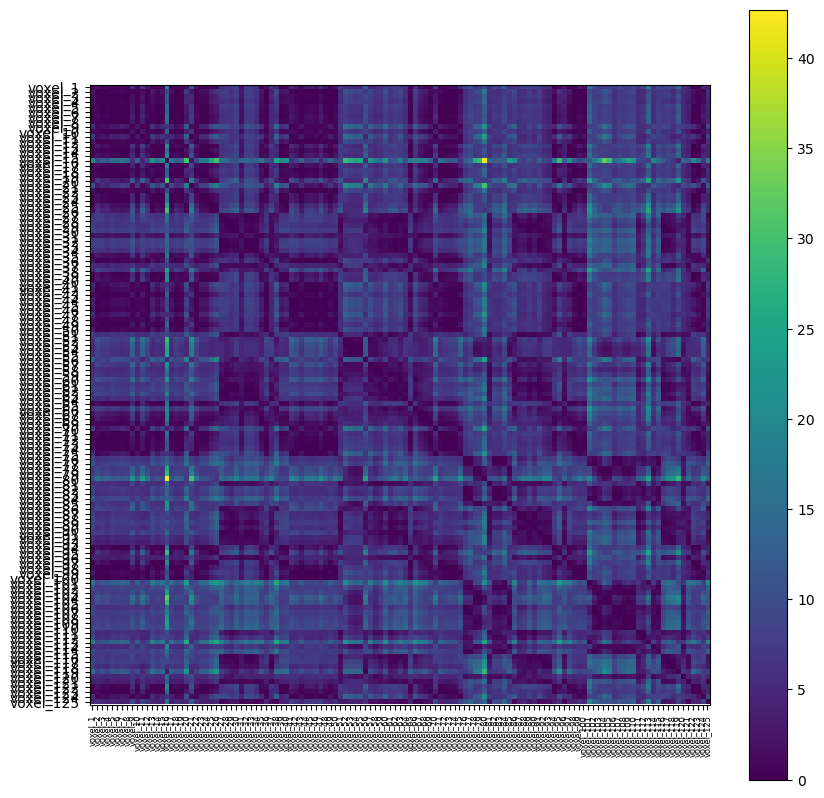

In [37]:
fig = plt.figure(figsize=(10,10))
plt.imshow(result_D2)
vxl_id = [f"voxel_{idx}" for idx in range(1,1+result_D2.shape[0])]
plt.xticks(np.arange(0,result_D2.shape[0]), vxl_id,rotation=90,fontsize=6)
plt.yticks(np.arange(0,result_D2.shape[0]), vxl_id,fontsize=6)

plt.colorbar()
plt.show()
